In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path
from scipy.stats import linregress
from datetime import datetime
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')


file = Path("data/US_Covid_data.csv")
file_df = pd.read_csv(file)
file_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN


In [2]:
#need to make region lists for pulling data.  Some regions are seperate cities

West = ['WA','OR','CA','NV','ID','MT','WY','UT','CO','AZ','NM']
Mid_West = ['ND', 'SD','NE', 'KS','MN','IA','MO','WI','IL','MI','OH']
North_East = ['ME','NH','VT', 'MA','CT','RMI','NY','PA','NJ']
South = ['TX','OK','AR','LA','MS','TN','KY','AL','FL','GA','SC','NC','VA','DC', 'MD', 'DE']

file_df["Region"] = file_df['state'].apply(lambda x:"West" if x in West else
                                               ('Mid_West' if x in Mid_West else
                                               ('North_East' if x in North_East else
                                               ('South' if x in South else np.nan))))

file_df




,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,Region
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN,Mid_West
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree,Mid_West
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree,South
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60055,02/09/2021,TX,2504556,NaN,NaN,13329,2676.0,43306,NaN,NaN,207,0.0,02/11/2021 12:00:00 AM,Not agree,Not agree,South
60056,11/20/2020,FL,913561,NaN,NaN,8217,1677.0,19014,NaN,NaN,79,5.0,11/20/2020 12:00:00 AM,Not agree,Not agree,South
60057,08/17/2020,NM,23500,NaN,NaN,92,0.0,682,NaN,NaN,4,0.0,08/19/2020 12:00:00 AM,NaN,Not agree,West
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0,06/19/2020 12:00:00 AM,Agree,Agree,South


In [3]:
#sort by month - needs to be in the same way the data is presented 
file_df['submission_date'] = pd.to_datetime(file_df['submission_date'])

file_df['Year'] = file_df['submission_date'].dt.year
file_df['Month'] = file_df['submission_date'].dt.month

file_df['yyyy-mm'] = file_df['submission_date'].dt.strftime('%Y-%m')

file_df.head()


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,Region,Year,Month,yyyy-mm
0,2021-03-11,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN,Mid_West,2021,3,2021-03
1,2021-12-01,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree,Mid_West,2021,12,2021-12
2,2022-01-02,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN,NaN,2022,1,2022-01
3,2021-11-22,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree,South,2021,11,2021-11
4,2022-05-30,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN,NaN,2022,5,2022-05


In [4]:
arizona = file_df.loc[(file_df["state"] == "AZ")]

arizona.head()


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,Region,Year,Month,yyyy-mm
15531,2021-09-12,AZ,1048600,963051.0,85549.0,2765,330.0,19187,17095.0,2092.0,4,2.0,09/13/2021 02:26:59 PM,Agree,Agree,West,2021,9,2021-09
15544,2020-02-13,AZ,1,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree,West,2020,2,2020-02
15597,2022-05-04,AZ,2025435,1790176.0,235259.0,3911,614.0,30189,26236.0,3953.0,238,41.0,05/05/2022 01:33:26 PM,Agree,Agree,West,2022,5,2022-05
15598,2021-01-26,AZ,733073,688186.0,44887.0,4751,308.0,12448,11117.0,1331.0,209,34.0,01/27/2021 02:53:24 PM,Agree,Agree,West,2021,1,2021-01
15616,2021-04-05,AZ,845535,785485.0,60050.0,608,70.0,16990,15063.0,1927.0,0,0.0,04/06/2021 01:43:58 PM,Agree,Agree,West,2021,4,2021-04


In [5]:
#list columns
arizona.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths', 'Region', 'Year', 'Month', 'yyyy-mm'],
      dtype='object')

In [6]:
#rename column
arizona = arizona.rename(columns={"submission_date":"Date","new_case":"New Case","conf_cases":"Confirmed Cases"}) 

arizona.head()

,Date,state,tot_cases,Confirmed Cases,prob_cases,New Case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,Region,Year,Month,yyyy-mm
15531,2021-09-12,AZ,1048600,963051.0,85549.0,2765,330.0,19187,17095.0,2092.0,4,2.0,09/13/2021 02:26:59 PM,Agree,Agree,West,2021,9,2021-09
15544,2020-02-13,AZ,1,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree,West,2020,2,2020-02
15597,2022-05-04,AZ,2025435,1790176.0,235259.0,3911,614.0,30189,26236.0,3953.0,238,41.0,05/05/2022 01:33:26 PM,Agree,Agree,West,2022,5,2022-05
15598,2021-01-26,AZ,733073,688186.0,44887.0,4751,308.0,12448,11117.0,1331.0,209,34.0,01/27/2021 02:53:24 PM,Agree,Agree,West,2021,1,2021-01
15616,2021-04-05,AZ,845535,785485.0,60050.0,608,70.0,16990,15063.0,1927.0,0,0.0,04/06/2021 01:43:58 PM,Agree,Agree,West,2021,4,2021-04


In [7]:
arizona_reduced = arizona[["Date","New Case","yyyy-mm"]]
arizona_reduced.head ()

,Date,New Case,yyyy-mm
15531,2021-09-12,2765,2021-09
15544,2020-02-13,0,2020-02
15597,2022-05-04,3911,2022-05
15598,2021-01-26,4751,2021-01
15616,2021-04-05,608,2021-04


In [8]:
arizona2 = arizona_reduced.sort_values(["Date"], ascending=True)

arizona2.head()

,Date,New Case,yyyy-mm
44420,2020-01-22,0,2020-01
22107,2020-01-23,0,2020-01
16997,2020-01-24,0,2020-01
20662,2020-01-25,0,2020-01
27714,2020-01-26,1,2020-01


In [9]:
arizona_drop = arizona2[(arizona2['New Case'] > 0)]
arizona_drop.head()


,Date,New Case,yyyy-mm
27714,2020-01-26,1,2020-01
33100,2020-03-03,1,2020-03
27130,2020-03-05,1,2020-03
28584,2020-03-07,2,2020-03
33050,2020-03-09,1,2020-03


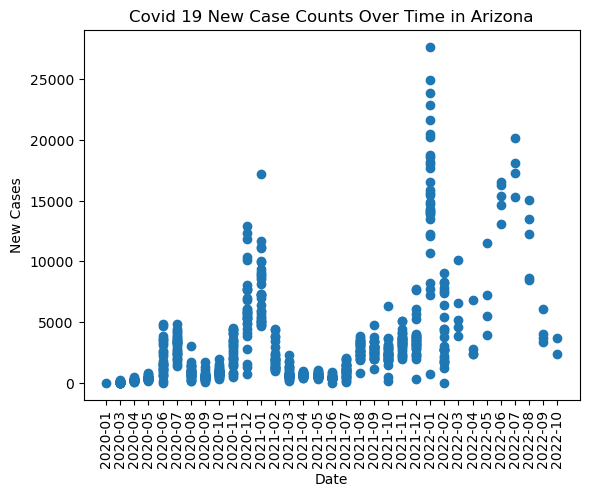

In [10]:
x_values = arizona_drop['yyyy-mm']
y_values = arizona_drop['New Case']

plt.scatter(x_values,y_values)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title ('Covid 19 New Case Counts Over Time in Arizona')
plt.xticks(rotation=90)


plt.show()

In [11]:
#Isolate West Regions in the US
west_df = file_df.loc[(file_df["Region"] == "West")]

#sort values by state and then by date assending
west_df = west_df.sort_values(["state","submission_date"], ascending=True)

#since the data is cumulative for total cases we drop all the duplicate year excet the last
#followed by dropping all the duplicate states except for the last.  
#this gives us the last point in each state for each year
west_df = west_df.drop_duplicates(subset=["Year","state"],keep="last")

#narrow down the cells to year and total cases
west_df = west_df[["tot_cases","Year","Region","state"]]
west_df.head()


,tot_cases,Year,Region,state
19514,520559,2020,West,AZ
24048,1381488,2021,West,AZ
43305,2277635,2022,West,AZ
34304,2231552,2020,West,CA
32687,5477529,2021,West,CA


In [12]:
west_mean = west_df.groupby(["Year"])["tot_cases"].mean()
west_mean

Year
2020    3.972156e+05
2021    1.019826e+06
2022    1.953416e+06
Name: tot_cases, dtype: float64

In [13]:
midwest_df = file_df.loc[(file_df["Region"] == "Mid_West")]
midwest_df = midwest_df.sort_values(["state","submission_date"], ascending=True)
midwest_df = midwest_df.drop_duplicates(subset=["Year","state"],keep="last")

midwest_df = midwest_df[["tot_cases","Year","Region"]]
midwest_df.head()

,tot_cases,Year,Region
51927,280669,2020,Mid_West
4077,582348,2021,Mid_West
295,861010,2022,Mid_West
41835,963389,2020,Mid_West
44539,2181009,2021,Mid_West


In [14]:
midwest_mean = midwest_df.groupby(["Year"])["tot_cases"].mean()
midwest_mean

Year
2020    4.091886e+05
2021    9.868936e+05
2022    1.624055e+06
Name: tot_cases, dtype: float64

In [15]:
northeast_df = file_df.loc[(file_df["Region"] == "North_East")]
northeast_df = northeast_df.sort_values(["state","submission_date"], ascending=True)
northeast_df = northeast_df.drop_duplicates(subset=["Year","state"],keep="last")

northeast_df = northeast_df[["tot_cases","Year","Region"]]
northeast_df.head()

,tot_cases,Year,Region
27389,185708,2020,North_East
43289,510188,2021,North_East
39778,907038,2022,North_East
11487,375178,2020,North_East
47538,1140614,2021,North_East


In [16]:
northeast_mean = northeast_df.groupby(["Year"])["tot_cases"].mean()
northeast_mean

Year
2020    2.624799e+05
2021    8.433019e+05
2022    1.456086e+06
Name: tot_cases, dtype: float64

In [17]:
south_df = file_df.loc[(file_df["Region"] == "South")]
south_df = south_df.sort_values(["state","submission_date"], ascending=True)
south_df = south_df.drop_duplicates(subset=["Year","state"],keep="last")

south_df = south_df[["tot_cases","Year","Region"]]
south_df.head()

,tot_cases,Year,Region
52542,361997,2020,South
9900,904460,2021,South
47018,1530803,2022,South
50262,225138,2020,South
993,566486,2021,South


In [51]:
south_mean = south_df.groupby(["Year"])["tot_cases"].mean()
south_mean

Year
2020    4.761513e+05
2021    1.331636e+06
2022    2.299723e+06
Name: tot_cases, dtype: float64

In [85]:
regional_total_case = pd.DataFrame({"West": west_mean,
                                   "Mid-West": midwest_mean,
                                   "North-East": northeast_mean,
                                   "South": south_mean})

regional_total_case

,West,Mid-West,North-East,South
Year,,,,
2020,3.972156e+05,4.091886e+05,2.624799e+05,4.761513e+05
2021,1.019826e+06,9.868936e+05,8.433019e+05,1.331636e+06
2022,1.953416e+06,1.624055e+06,1.456086e+06,2.299723e+06


In [86]:
#subtract 2020 from 2021 totals
#Calculates the difference of a DataFrame element compared with another element in the DataFrame (default is element in previous row).
#https://datagy.io/pandas-diff/
# Make sure the firt number stays the same https://stackoverflow.com/questions/56364686/diff-excluding-the-first-row-of-each-group
#fillna - stops the first value from turning into a NAN

regional_total_case['West'] = regional_total_case['West'].diff().fillna(regional_total_case.West)
regional_total_case['Mid-West'] = regional_total_case['Mid-West'].diff().fillna(regional_total_case["Mid-West"])
regional_total_case['North-East'] = regional_total_case['North-East'].diff().fillna(regional_total_case["North-East"])
regional_total_case['South'] = regional_total_case['South'].diff().fillna(regional_total_case.South)

regional_total_case


,West,Mid-West,North-East,South
Year,,,,
2020,397215.636364,409188.636364,262479.888889,476151.3125
2021,622610.363636,577705.000000,580822.000000,855484.2500
2022,933589.545455,637161.818182,612783.888889,968087.0625


<function matplotlib.pyplot.show(close=None, block=None)>

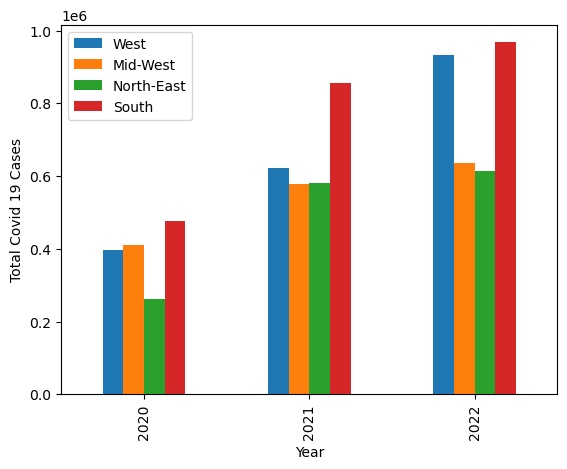

In [87]:
regional_total_case.plot(kind="bar")
plt.ylabel("Total Covid 19 Cases")
plt.xlabel("Year")
plt.savefig("output_data/regionalbar.png")
plt.show

In [88]:
#make a dataframe of region data by year and total cases
#2020, 2021, 2022

west_2020 = west_df.loc[(west_df["Year"] == 2020)]
west_2021 = west_df.loc[(west_df["Year"] == 2021)]
west_2022 = west_df.loc[(west_df["Year"] == 2022)]

In [89]:
midwest_2020 = midwest_df.loc[(midwest_df["Year"] == 2020)]
midwest_2021 = midwest_df.loc[(midwest_df["Year"] == 2021)]
midwest_2022 = midwest_df.loc[(midwest_df["Year"] == 2022)]

In [90]:
northeast_2020 = northeast_df.loc[(northeast_df["Year"] == 2020)]
northeast_2021 = northeast_df.loc[(northeast_df["Year"] == 2021)]
northeast_2022 = northeast_df.loc[(northeast_df["Year"] == 2022)]

In [91]:
south_2020 = south_df.loc[(south_df["Year"] == 2020)]
south_2021 = south_df.loc[(south_df["Year"] == 2021)]
south_2022 = south_df.loc[(south_df["Year"] == 2022)]

In [92]:
#https://pandas.pydata.org/docs/user_guide/merging.html

frames_2020 = [west_2020,midwest_2020,northeast_2020,south_2020]
region_2020 = pd.concat(frames_2020)
region_2020.head()

,tot_cases,Year,Region,state
19514,520559,2020,West,AZ
34304,2231552,2020,West,CA
45777,347301,2020,West,CO
30438,141077,2020,West,ID
33246,81555,2020,West,MT


In [93]:
#I was having trouble getting the title to change.  
#https://stackoverflow.com/questions/19442060/matplotlib-pyplot-titlestring-returns-error

import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

<function matplotlib.pyplot.show(close=None, block=None)>

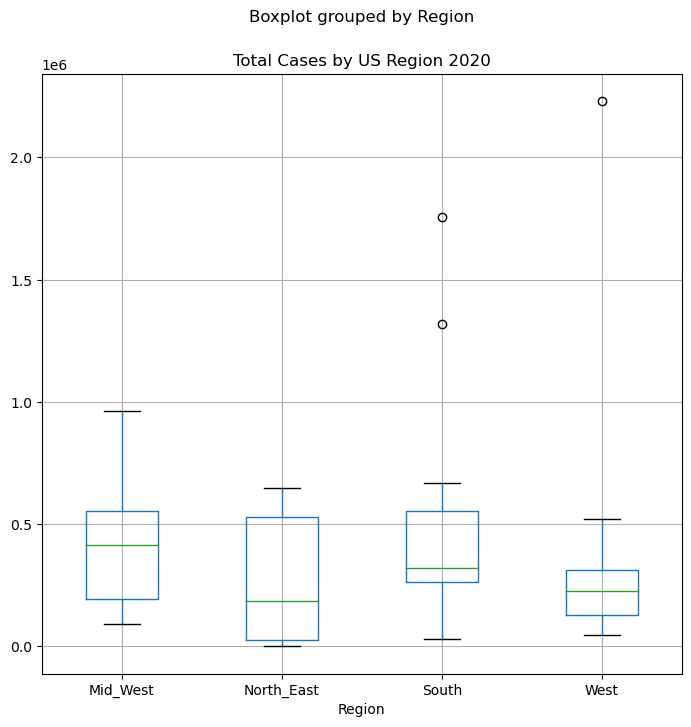

In [94]:
#create boxplot for 2020
region_2020_bplt = region_2020.boxplot("tot_cases", by="Region", figsize=(8,8))
region_2020_bplt.plot()
plt.title("Total Cases by US Region 2020")
plt.tight_layout
plt.savefig("output_data/boxplot2020.png")
plt.show

In [95]:
#extract the individual number groups
groupMid = region_2020[region_2020["Region"] == "Mid_West"]["tot_cases"]
groupNorth_East = region_2020[region_2020["Region"] == "North_East"]["tot_cases"]
groupSouth = region_2020[region_2020["Region"] == "South"]["tot_cases"]
groupWest = region_2020[region_2020["Region"] == "West"]["tot_cases"]


In [96]:
#anova stats for 2020 cases
#F-value = variation between sample means / variation within the samples

st.f_oneway(groupMid, groupNorth_East, groupSouth, groupWest)

F_onewayResult(statistic=0.4574350609262797, pvalue=0.7134343877373392)

There is no statistically significant difference in the mean of the total cases of Covid 19 by reagion for 2020 (p>0.05).  A low F value indicates there is no difference between the samples means and the variation within the samples.

In [97]:
frames_2021 = [west_2021,midwest_2021,northeast_2021,south_2021]
region_2021 = pd.concat(frames_2021)
region_2021.head()

,tot_cases,Year,Region,state
24048,1381488,2021,West,AZ
32687,5477529,2021,West,CA
46704,957696,2021,West,CO
33790,319382,2021,West,ID
16761,197724,2021,West,MT


<function matplotlib.pyplot.show(close=None, block=None)>

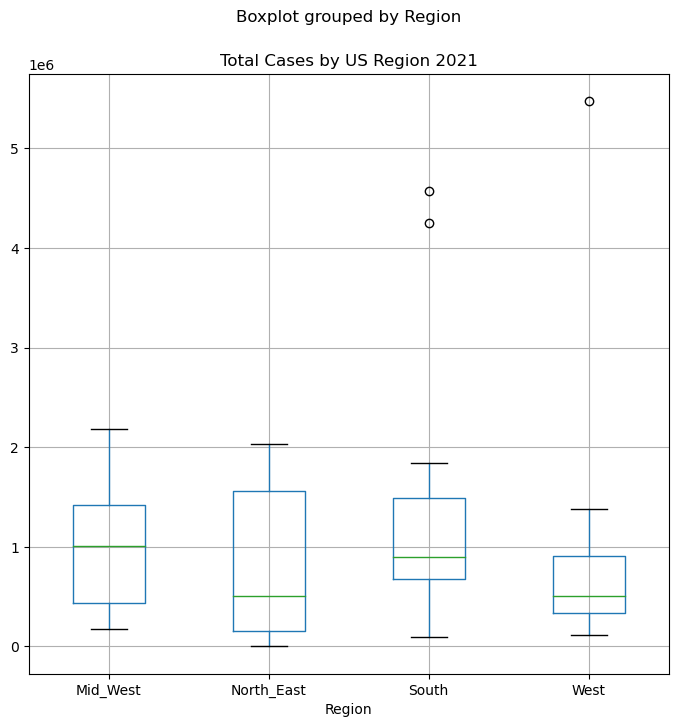

In [98]:
#create boxplot for 2021
region_2021_bplt = region_2021.boxplot("tot_cases", by="Region", figsize=(8,8))
region_2021_bplt.plot()
plt.title("Total Cases by US Region 2021")
plt.tight_layout
plt.savefig("output_data/boxplot2021.png")
plt.show


In [99]:
#extract the individual number groups
groupMid1 = region_2021[region_2021["Region"] == "Mid_West"]["tot_cases"]
groupNorth_East1 = region_2021[region_2021["Region"] == "North_East"]["tot_cases"]
groupSouth1 = region_2021[region_2021["Region"] == "South"]["tot_cases"]
groupWest1 = region_2021[region_2021["Region"] == "West"]["tot_cases"]

In [100]:
#anova stats for 2021 cases
#F-value = variation between sample means / variation within the samples

st.f_oneway(groupMid1, groupNorth_East1, groupSouth1, groupWest1)

F_onewayResult(statistic=0.40136746035849225, pvalue=0.7527173594746062)

There is no statistically significant difference in the mean of the total cases of Covid 19 by reagion for 2021 (p>0.05).  A low F value indicates there is no difference between the samples means and the variation within the samples.

In [101]:
frames_2022 = [west_2022,midwest_2022,northeast_2022,south_2022]
region_2022 = pd.concat(frames_2022)
region_2022.head()

,tot_cases,Year,Region,state
43305,2277635,2022,West,AZ
28617,11309237,2022,West,CA
50632,1665451,2022,West,CO
25720,498082,2022,West,ID
18554,312863,2022,West,MT


<function matplotlib.pyplot.show(close=None, block=None)>

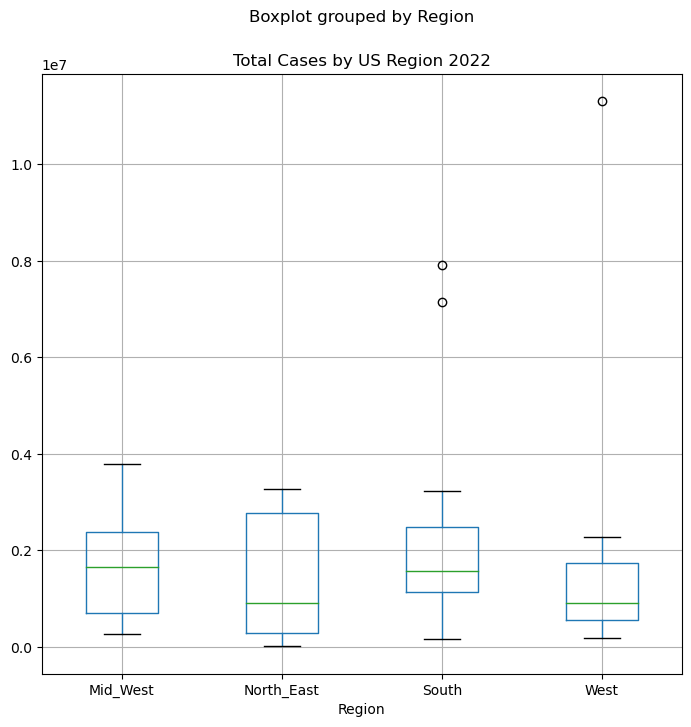

In [102]:
#create boxplot for 2022
region_2022_bplt = region_2022.boxplot("tot_cases", by="Region", figsize=(8,8))
region_2022_bplt.plot()
plt.title("Total Cases by US Region 2022")
plt.tight_layout
plt.savefig("output_data/boxplot2022.png")
plt.show

In [103]:
#extract the individual number groups
groupMid2 = region_2022[region_2022["Region"] == "Mid_West"]["tot_cases"]
groupNorth_East2 = region_2022[region_2022["Region"] == "North_East"]["tot_cases"]
groupSouth2 = region_2022[region_2022["Region"] == "South"]["tot_cases"]
groupWest2 = region_2022[region_2022["Region"] == "West"]["tot_cases"]

In [104]:
#anova stats for 2022 cases
#F-value = variation between sample means / variation within the samples

st.f_oneway(groupMid2, groupNorth_East2, groupSouth2, groupWest2)

F_onewayResult(statistic=0.3662554959086571, pvalue=0.7776941889933942)

There is no statistically significant difference in the mean of the total cases of Covid 19 by reagion for 2022 (p>0.05). A low F value indicates there is no difference between the samples means and the variation within the samples.

In [105]:
goupstats =[[2020,0.46,0.71],
            [2021,0.40, 0.75],
            [2020,0.37,0.78]]

#Header
column_names = ["Year","F value","p value"]

#data frame
stats_df=pd.DataFrame(goupstats, columns=column_names)
stats_df.to_csv("output_data/stats.csv")
stats_df

,Year,F value,p value
0,2020,0.46,0.71
1,2021,0.40,0.75
2,2020,0.37,0.78
